In [4]:
import math
import random
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [5]:
fx = lambda x: ((15 * x**3 + 21 * x**2 + 41 * x + 3)**0.25) * math.exp(-0.5*x)
a = 1
b = 4
step = 100
np.random.seed(4)
random.seed(4)

In [7]:
def approx_integration(n, a, b, fx):
    sum = 0
    for i in range(n):
        xi = random.uniform(a, b)
        sum += fx(xi)
    return (1/n) * (b-a) * sum
        
def compare(fx, a, b, n):
    
    res2 = scipy.integrate.quad(fx, a, b)
    closet_idx = 0
    loop_idx = 0
    diff = 1000000000
    
    arr = []
    for current_step in range(n, 10000 + n, n ):
        temp = approx_integration(current_step, a, b, fx)
        print("current_step ", current_step, " res ", temp)
        arr.append(temp)
        
        if abs(temp - res2[0]) < diff:
            diff = abs(temp - res2[0])
            closet_idx = loop_idx
        loop_idx += 1
    
    print("scipy integrate ", res2)
    print("closet index ", closet_idx, " with n ", (closet_idx+1) * n, " with val ", arr[closet_idx])
    
    return arr, res2, closet_idx #not sure if this method of getting best n is correct (should we get it from 1/sqrt(n) instead?)



current_step  100  res  3.907882770480363
current_step  200  res  4.002755089274321
current_step  300  res  3.903654807038775
current_step  400  res  4.087561980684075
current_step  500  res  4.002760528733578
current_step  600  res  4.057172754596038
current_step  700  res  3.9702558550552807
current_step  800  res  4.006655209123282
current_step  900  res  3.9842328045737414
current_step  1000  res  3.9706884318098914
current_step  1100  res  3.9841644198018518
current_step  1200  res  4.005707272517735
current_step  1300  res  3.9824081540650567
current_step  1400  res  4.022607381075591
current_step  1500  res  4.005454857380913
current_step  1600  res  4.009036114611468
current_step  1700  res  4.007296466518539
current_step  1800  res  3.996336038731583
current_step  1900  res  4.000755487234156
current_step  2000  res  4.005362232398785
current_step  2100  res  3.9722408227632124
current_step  2200  res  4.0154465917756195
current_step  2300  res  4.010798006648439
current_step 

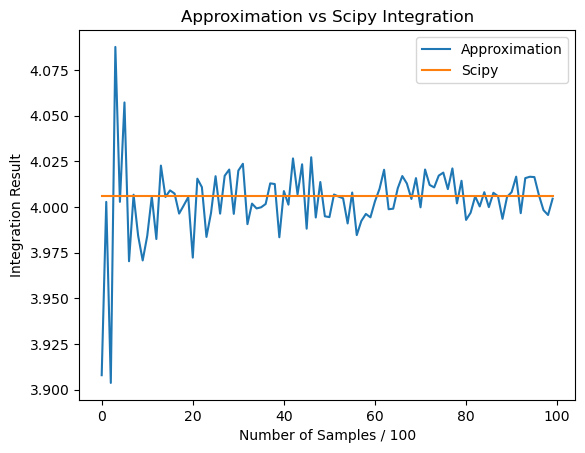

In [9]:
#req 1
arr, res2, closet_idx = compare(fx, a, b, step)  

# Plot the results on the same graph
plt.plot(arr, label="Approximation")
plt.plot([res2[0]] * len(arr), label="Scipy")
plt.title("Approximation vs Scipy Integration")
plt.xlabel(f"Number of Samples / {step}")
plt.ylabel("Integration Result")
plt.legend()
plt.show()

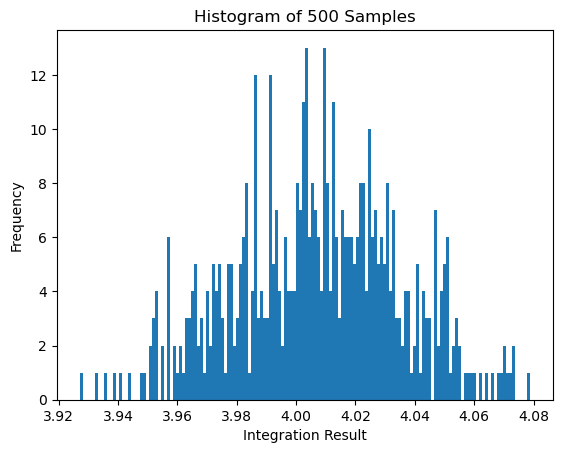

In [19]:
step = 1000
arr2 = []
for i in range(500):
    arr2.append(approx_integration(step, a, b, fx))

plt.hist(arr2, bins=150)
plt.title("Histogram of 500 Samples")
plt.xlabel("Integration Result")
plt.ylabel("Frequency")
#plt.legend()
plt.show()

    

In [21]:
# yes it follows the normal distribution

print("Mean: ", np.mean(arr2))
print("Standard Deviation: ", np.std(arr2))

Mean:  4.006909791402727
Standard Deviation:  0.028282383189854186
